<a href="https://colab.research.google.com/github/yuliiabosher/Fiber-optic-project/blob/european_historical_data/EU_historical_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Geopandas was installed in the Google Colab environment.

In [1]:
!pip install geopandas

The required Python libraries were imported

In [27]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

The sheet 'Data' was loaded from the Excel document that could be downloaded using the following link https://ec.europa.eu/newsroom/dae/redirection/document/106734 found at https://digital-strategy.ec.europa.eu/en/library/digital-decade-2024-broadband-coverage-europe-2023. The columns of interest were separated.

In [3]:
eu_broadband = pd.read_excel('https://ec.europa.eu/newsroom/dae/redirection/document/106734', sheet_name ='Data', skiprows=6)
eu_columns = ['Country', 'Metric', 'Geography level', 2018, 2019, 2020, 2021, 2022, 2023]
eu_broadband = eu_broadband[eu_columns]
display(eu_broadband.head())

,Country,Metric,Geography level,2018,2019,2020,2021,2022,2023
0,Austria,Land area,Total,8.387900e+04,83879.000,8.387900e+04,83927.0,83927.0,83927.0
1,Austria,Population,Total,8.772865e+06,8858775.000,8.901064e+06,8932664.0,8978929.0,9104772.0
2,Austria,Households,Total,3.935534e+06,3883312.000,3.918929e+06,3959143.0,3995050.0,4033080.0
3,Austria,Broadband coverage (>2Mbps),Total,3.858862e+06,3813412.384,3.863423e+06,NaN,NaN,NaN
4,Austria,Broadband coverage (>30Mbps),Total,2.847375e+06,3058873.000,3.394576e+06,3694166.0,3787714.0,3797226.0


The base dataframe datatypes and number of missing values are as follows

In [4]:
display(eu_broadband.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650 entries, 0 to 1649
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          1650 non-null   object 
 1   Metric           1650 non-null   object 
 2   Geography level  1650 non-null   object 
 3   2018             1122 non-null   float64
 4   2019             1091 non-null   float64
 5   2020             1157 non-null   float64
 6   2021             1138 non-null   float64
 7   2022             1170 non-null   float64
 8   2023             1138 non-null   float64
dtypes: float64(6), object(3)
memory usage: 116.1+ KB


None

The distinct values in the 'Geography level' column are as follows

In [5]:
display(eu_broadband['Geography level'].unique())

array(['Total', 'Rural'], dtype=object)

The EU broadband dataframe was cleaned to include 'Total' values only in the 'Geography level' column.

In [6]:
eu_broadband = eu_broadband.query('`Geography level` == "Total"')
display(eu_broadband['Geography level'].unique())
display(eu_broadband.head())

array(['Total'], dtype=object)

,Country,Metric,Geography level,2018,2019,2020,2021,2022,2023
0,Austria,Land area,Total,8.387900e+04,83879.000,8.387900e+04,83927.0,83927.0,83927.0
1,Austria,Population,Total,8.772865e+06,8858775.000,8.901064e+06,8932664.0,8978929.0,9104772.0
2,Austria,Households,Total,3.935534e+06,3883312.000,3.918929e+06,3959143.0,3995050.0,4033080.0
3,Austria,Broadband coverage (>2Mbps),Total,3.858862e+06,3813412.384,3.863423e+06,NaN,NaN,NaN
4,Austria,Broadband coverage (>30Mbps),Total,2.847375e+06,3058873.000,3.394576e+06,3694166.0,3787714.0,3797226.0


The values in the 'Country' column of the EU broadband dataframe are as follows.

In [7]:
display(eu_broadband['Country'].unique())

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Lithuania', 'Latvia',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom', 'EU27', 'EU28'], dtype=object)

The values 'EU27' and 'EU28' were dropped from the 'Country' column.

In [8]:
eu_broadband = eu_broadband.query('`Country` != "EU27" & `Country` != "EU28"')
display(eu_broadband['Country'].unique())

array(['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
       'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece',
       'Hungary', 'Iceland', 'Ireland', 'Italy', 'Lithuania', 'Latvia',
       'Luxembourg', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden',
       'Switzerland', 'United Kingdom'], dtype=object)

Following the cleaning steps the 'Geography level' column was dropped altogether.

In [9]:
eu_broadband = eu_broadband.drop(columns=['Geography level'])
display(eu_broadband.head())

,Country,Metric,2018,2019,2020,2021,2022,2023
0,Austria,Land area,8.387900e+04,83879.000,8.387900e+04,83927.0,83927.0,83927.0
1,Austria,Population,8.772865e+06,8858775.000,8.901064e+06,8932664.0,8978929.0,9104772.0
2,Austria,Households,3.935534e+06,3883312.000,3.918929e+06,3959143.0,3995050.0,4033080.0
3,Austria,Broadband coverage (>2Mbps),3.858862e+06,3813412.384,3.863423e+06,NaN,NaN,NaN
4,Austria,Broadband coverage (>30Mbps),2.847375e+06,3058873.000,3.394576e+06,3694166.0,3787714.0,3797226.0


The distinct metrics in the base dataframe are as follows

In [10]:
display(eu_broadband['Metric'].unique())

array(['Land area', 'Population', 'Households',
       'Broadband coverage (>2Mbps)', 'Broadband coverage (>30Mbps)',
       'Broadband coverage (>100Mbps)', 'Broadband coverage (>1Gbps)',
       'Broadband coverage (>1Gbps upload and download)',
       'Fixed broadband coverage', 'NGA coverage',
       'Fixed VHCN coverage (FTTP & DOCSIS 3.1)',
       'VHCN coverage (as defined by BEREC)', 'DSL', 'VDSL',
       'VDSL 2 Vectoring', 'FTTP', 'Cable modem DOCSIS 3.0',
       'Cable modem DOCSIS 3.1', 'FWA', 'LTE', 'Average LTE coverage',
       '5G', '5G in the 3.4–3.8\xa0GHz band', 'Satellite',
       'Overall broadband coverage', 'DOCSIS 3.0 & FTTP coverage',
       'Cable modem', 'WiMAX', 'HSPA'], dtype=object)

The dataframe was cleaned to include 'FTTP' or 'Households' values only in the 'Metric' column.

In [11]:
eu_broadband = eu_broadband.query('`Metric` == "FTTP" | `Metric` == "Households"')
display(eu_broadband['Metric'].unique())
display(eu_broadband.head())

array(['Households', 'FTTP'], dtype=object)

,Country,Metric,2018,2019,2020,2021,2022,2023
2,Austria,Households,3.935534e+06,3.883312e+06,3.918929e+06,3.959143e+06,3.995050e+06,4.033080e+06
15,Austria,FTTP,5.129324e+05,5.347910e+05,8.050150e+05,1.054017e+06,1.463133e+06,1.652409e+06
31,Belgium,Households,4.914168e+06,4.899404e+06,4.751936e+06,4.989764e+06,5.022036e+06,4.818475e+06
44,Belgium,FTTP,6.868876e+04,1.749232e+05,3.094723e+05,5.032566e+05,8.619481e+05,1.204619e+06
60,Bulgaria,Households,2.930380e+06,2.877314e+06,2.888188e+06,2.881895e+06,2.849557e+06,2.803352e+06


The year columns were collapsed changing the dataframe from wide to long format.

In [12]:
eu_broadband = eu_broadband.melt(id_vars=['Country', 'Metric'], var_name='Year', value_name='Number of households')
display(eu_broadband.head())

,Country,Metric,Year,Number of households
0,Austria,Households,2018,3.935534e+06
1,Austria,FTTP,2018,5.129324e+05
2,Belgium,Households,2018,4.914168e+06
3,Belgium,FTTP,2018,6.868876e+04
4,Bulgaria,Households,2018,2.930380e+06


The 'Metric' column was transformed from long to wide format.

In [13]:
eu_broadband = eu_broadband.pivot(index =['Country', 'Year'], columns='Metric', values = 'Number of households')
display(eu_broadband)

Metric                       FTTP    Households
Country        Year                            
Austria        2018  5.129324e+05  3.935534e+06
               2019  5.347910e+05  3.883312e+06
               2020  8.050150e+05  3.918929e+06
               2021  1.054017e+06  3.959143e+06
               2022  1.463133e+06  3.995050e+06
...                           ...           ...
United Kingdom 2019  2.654659e+06  3.117797e+07
               2020  4.566558e+06  3.157650e+07
               2021  6.791722e+06  2.919635e+07
               2022  1.079281e+07  2.969939e+07
               2023  1.525109e+07  2.956218e+07

[186 rows x 2 columns]

The dataframe index was reset to columns.

In [14]:
eu_broadband = eu_broadband.reset_index()
eu_broadband

Metric,Country,Year,FTTP,Households
0,Austria,2018,5.129324e+05,3.935534e+06
1,Austria,2019,5.347910e+05,3.883312e+06
2,Austria,2020,8.050150e+05,3.918929e+06
3,Austria,2021,1.054017e+06,3.959143e+06
4,Austria,2022,1.463133e+06,3.995050e+06
...,...,...,...,...
181,United Kingdom,2019,2.654659e+06,3.117797e+07
182,United Kingdom,2020,4.566558e+06,3.157650e+07
183,United Kingdom,2021,6.791722e+06,2.919635e+07
184,United Kingdom,2022,1.079281e+07,2.969939e+07


The column axis was renamed from 'Metric' to None.

In [15]:
eu_broadband = eu_broadband.rename_axis(columns=None)
display(eu_broadband.head())

,Country,Year,FTTP,Households
0,Austria,2018,5.129324e+05,3.935534e+06
1,Austria,2019,5.347910e+05,3.883312e+06
2,Austria,2020,8.050150e+05,3.918929e+06
3,Austria,2021,1.054017e+06,3.959143e+06
4,Austria,2022,1.463133e+06,3.995050e+06


'FTTP' column was divided by 'Households' column and multipled by 100 to create a new column titled 'Percentage of households with FTTP availability'.

In [16]:
eu_broadband['Percentage of households with FTTP availability'] = eu_broadband['FTTP'] / eu_broadband['Households'] * 100
display(eu_broadband.head())

,Country,Year,FTTP,Households,Percentage of households with FTTP availability
0,Austria,2018,5.129324e+05,3.935534e+06,13.033364
1,Austria,2019,5.347910e+05,3.883312e+06,13.771518
2,Austria,2020,8.050150e+05,3.918929e+06,20.541709
3,Austria,2021,1.054017e+06,3.959143e+06,26.622352
4,Austria,2022,1.463133e+06,3.995050e+06,36.623647


The SHP file was downloaded at https://ec.europa.eu/eurostat/web/gisco/geodata/administrative-units/countries with the following parameters: Year - 2024, File Format - SHP, Geometry Type - Polygons (RG), Scale - 01M, Coordinate Reference System - EPSG 4326.

In [17]:
country_polygons = gpd.read_file('https://raw.githubusercontent.com/yuliiabosher/Fiber-optic-project/refs/heads/european_historical_data/CNTR_RG_01M_2024_4326.shp.zip')
display(country_polygons.head())

,CNTR_ID,CNTR_NAME,NAME_ENGL,NAME_FREN,ISO3_CODE,SVRG_UN,CAPT,EU_STAT,EFTA_STAT,CC_STAT,NAME_GERM,geometry
0,AD,Andorra,Andorra,Andorre,AND,UN Member State,Andorra la Vella,F,F,F,Andorra,"POLYGON ((1.57472 42.64779, 1.58054 42.63804, ..."
1,AE,الإمارات العربية المتحدة,United Arab Emirates,Émirats arabes unis,ARE,UN Member State,Abu Dhabi,F,F,F,Vereinigten Arabischen Emirate,"MULTIPOLYGON (((56.38171 25.3521, 56.377 25.35..."
2,AF,افغانستان-افغانستان,Afghanistan,Afghanistan,AFG,UN Member State,Kabul,F,F,F,Afghanistan,"POLYGON ((71.03061 38.45177, 71.04486 38.42181..."
3,AG,Antigua and Barbuda,Antigua and Barbuda,Antigua-et-Barbuda,ATG,UN Member State,St John's,F,F,F,Antigua und Barbuda,"MULTIPOLYGON (((-61.65911 17.0691, -61.6621 17..."
4,AI,Anguilla,Anguilla,Anguilla,AIA,UK Non-Self-Governing Territory,The Valley,F,F,F,Anguilla,"MULTIPOLYGON (((-62.95206 18.27833, -62.95537 ..."


The columns 'NAME_ENGL' and 'geometry' were separated to create a new cleaned dataframe.

In [18]:
country_polygons = country_polygons[['NAME_ENGL', 'geometry']]
display(country_polygons.head())

,NAME_ENGL,geometry
0,Andorra,"POLYGON ((1.57472 42.64779, 1.58054 42.63804, ..."
1,United Arab Emirates,"MULTIPOLYGON (((56.38171 25.3521, 56.377 25.35..."
2,Afghanistan,"POLYGON ((71.03061 38.45177, 71.04486 38.42181..."
3,Antigua and Barbuda,"MULTIPOLYGON (((-61.65911 17.0691, -61.6621 17..."
4,Anguilla,"MULTIPOLYGON (((-62.95206 18.27833, -62.95537 ..."


The EU broadband dataframe and the country polygons dataframe were merged on the country name column.

In [19]:
eu_broadband_geo = eu_broadband.merge(country_polygons, left_on='Country', right_on='NAME_ENGL', how='left')
display(eu_broadband_geo.head())

,Country,Year,FTTP,Households,Percentage of households with FTTP availability,NAME_ENGL,geometry
0,Austria,2018,5.129324e+05,3.935534e+06,13.033364,Austria,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
1,Austria,2019,5.347910e+05,3.883312e+06,13.771518,Austria,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2,Austria,2020,8.050150e+05,3.918929e+06,20.541709,Austria,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
3,Austria,2021,1.054017e+06,3.959143e+06,26.622352,Austria,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
4,Austria,2022,1.463133e+06,3.995050e+06,36.623647,Austria,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."


The column 'NAME_ENGL' with duplicated values was dropped.

In [20]:
eu_broadband_geo = eu_broadband_geo.drop(columns=['NAME_ENGL'])
display(eu_broadband_geo.head())

,Country,Year,FTTP,Households,Percentage of households with FTTP availability,geometry
0,Austria,2018,5.129324e+05,3.935534e+06,13.033364,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
1,Austria,2019,5.347910e+05,3.883312e+06,13.771518,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2,Austria,2020,8.050150e+05,3.918929e+06,20.541709,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
3,Austria,2021,1.054017e+06,3.959143e+06,26.622352,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
4,Austria,2022,1.463133e+06,3.995050e+06,36.623647,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."


All the values in the 'geometry' column are non-null, which means that no record was left unmatched after merging.

In [21]:
display(eu_broadband_geo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 6 columns):
 #   Column                                           Non-Null Count  Dtype   
---  ------                                           --------------  -----   
 0   Country                                          186 non-null    object  
 1   Year                                             186 non-null    int64   
 2   FTTP                                             186 non-null    float64 
 3   Households                                       186 non-null    float64 
 4   Percentage of households with FTTP availability  186 non-null    float64 
 5   geometry                                         186 non-null    geometry
dtypes: float64(3), geometry(1), int64(1), object(1)
memory usage: 8.8+ KB


None

The 'Year' column was set as index to make it easier to separate a particular year.

In [22]:
eu_broadband_geo = eu_broadband_geo.set_index('Year')
display(eu_broadband_geo.head())

,Country,FTTP,Households,Percentage of households with FTTP availability,geometry
Year,,,,,
2018,Austria,5.129324e+05,3.935534e+06,13.033364,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2019,Austria,5.347910e+05,3.883312e+06,13.771518,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2020,Austria,8.050150e+05,3.918929e+06,20.541709,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2021,Austria,1.054017e+06,3.959143e+06,26.622352,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2022,Austria,1.463133e+06,3.995050e+06,36.623647,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."


The dataframe was converted to geodataframe.

In [24]:
eu_broadband_geo = gpd.GeoDataFrame(eu_broadband_geo, geometry='geometry')
display(eu_broadband_geo.head())

,Country,FTTP,Households,Percentage of households with FTTP availability,geometry
Year,,,,,
2018,Austria,5.129324e+05,3.935534e+06,13.033364,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2019,Austria,5.347910e+05,3.883312e+06,13.771518,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2020,Austria,8.050150e+05,3.918929e+06,20.541709,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2021,Austria,1.054017e+06,3.959143e+06,26.622352,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."
2022,Austria,1.463133e+06,3.995050e+06,36.623647,"MULTIPOLYGON (((10.44933 47.54509, 10.45444 47..."


The function to plot the choropleth was defined.

In [40]:
def plot_choropleth(geo_df, year):
  fig, ax = plt.subplots(1, 1)
  eu_broadband_geo.loc[year].plot(column='Percentage of households with FTTP availability', cmap='Blues', ax=ax)
  fig.set_size_inches(8,6)
  plt.style.use('seaborn-v0_8-whitegrid')
  font = {'family':'monospace','color':'black','size':20}
  ax.set_title(year, fontdict = font)
  plt.axis('off')
  plt.show()

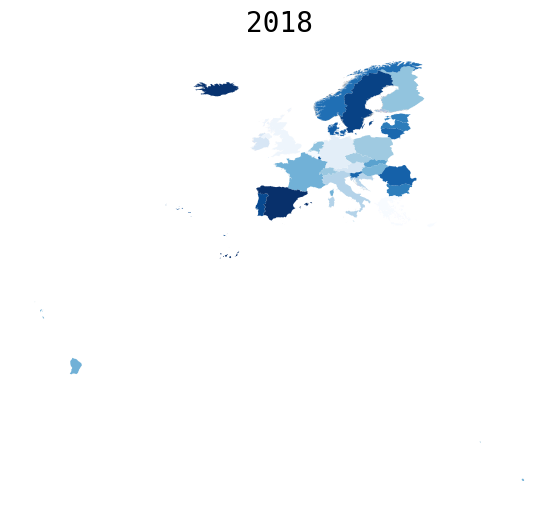

In [41]:
plot_choropleth(eu_broadband_geo, 2018)

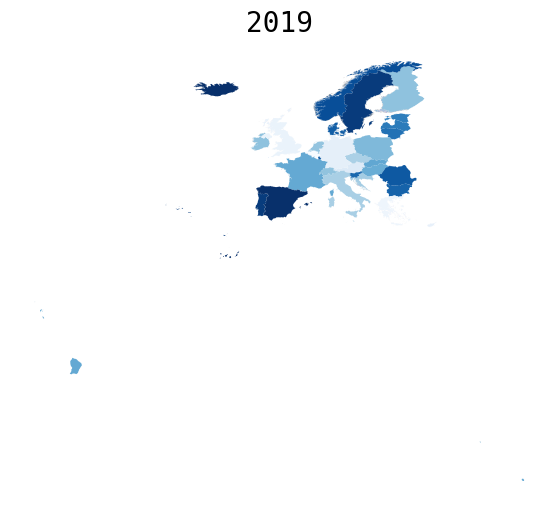

In [42]:
plot_choropleth(eu_broadband_geo, 2019)

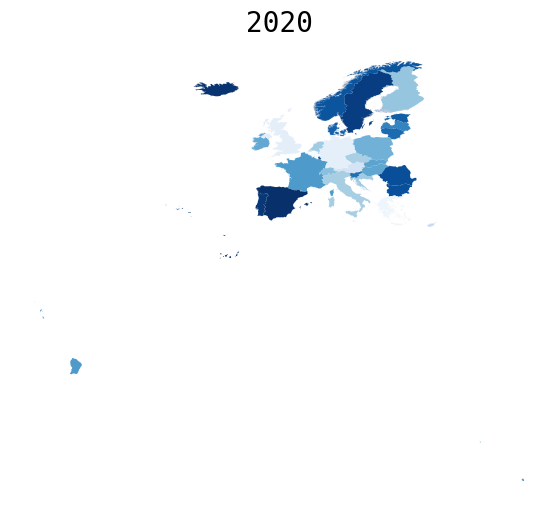

In [43]:
plot_choropleth(eu_broadband_geo, 2020)

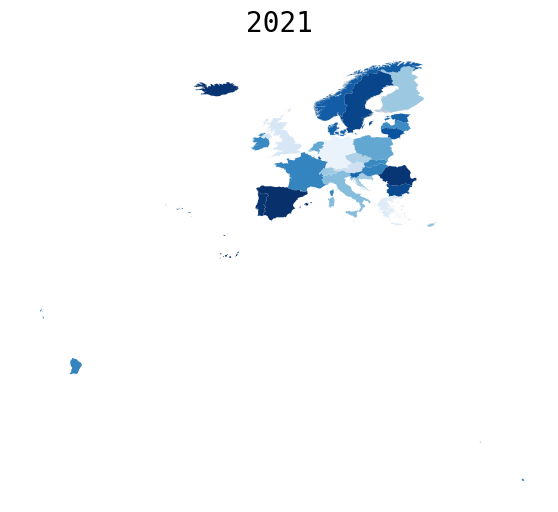

In [44]:
plot_choropleth(eu_broadband_geo, 2021)

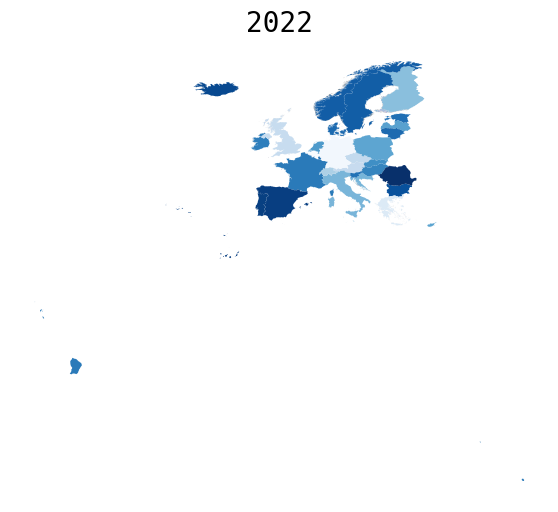

In [45]:
plot_choropleth(eu_broadband_geo, 2022)

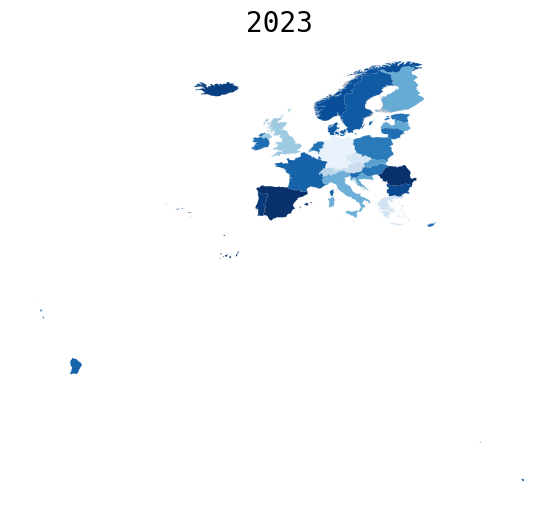

In [46]:
plot_choropleth(eu_broadband_geo, 2023)